# Trend Analysis using Python
       
<img src="img/profile_manoelgadi.png" width=100 height=100 align="right">

Author: Prof. Manoel Gadi

Contact: mfalonso@faculty.ie.edu

Teaching Web: http://mfalonso.pythonanywhere.com

Last revision: 08/October/2024
    
        

# Time Series Analysis

Time series forecasting is __fundamental for various use cases in different domains such as energy
systems and economics__. Creating a forecasting model for a specific use case requires an iterative and
complex design process. The typical design process includes the five sections:
* (1) data pre-processing,
* (2) feature engineering, 
* (3) hyperparameter optimization, 
* (4) forecasting method selection, and 
* (5) forecast ensembling



## What is the time series
A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Time series are used in statistics, signal processing, pattern recognition, econometrics, mathematical finance, weather forecasting, earthquake prediction, electroencephalography, control engineering, astronomy, communications engineering, and largely in any domain of applied science and engineering which involves temporal measurements. [1]

<img src="img/forecasting_pipeline.png" >

<img src="https://miro.medium.com/max/1400/0*bCS3EWiVfLIZqwIW.gif">

## Let's start with the basics - The Components of a Time Series

Time series has four components. Any time series can contain some or all of the following components: [2]
- Trend (T)
-  Seasonal (S)
-  Cyclical (C)
- Irregular - Random (I)

These components may be combined in different ways. It is usually assumed that they are multiplied or
added, i.e. 

yt = T × C × S × I
yt = T + C + S + I

**Trend Component:**  The trend is the long term pattern of a time series. A trend can be positive or negative depending on whether
the time series exhibits an increasing long term pattern or a decreasing long term pattern. If a time series does not show an increasing or decreasing pattern then the series is stationary in the mean.

**Cyclical component:** Any pattern showing an up and down movement around a given trend is identified as a cyclical pattern. The duration of a cycle depends on the type of business or industry being analyzed. 

**Seasonal component:** Seasonality occurs when the time series exhibits regular fluctuations during the same month (or months) every year, or during the same quarter every year. For instance, retail sales peak during the month of December. 

**Irregular component:**  This component is unpredictable. Every time series has some unpredictable component that makes it a random variable. In prediction, the objective is to “model” all the components to the point that the only component that remains unexplained is the random component.


## The Box-Jenkins Methodology. ARIMA Models

The Box-Jenkins Model forecasts data using three principles: autoregression, differencing, and
moving average. Each principle is used in the Box-Jenkins analysis; together, they are collectively
shown as ARIMA (p, d, q). The methodology allows the model to identify trends using
autoregresssion, moving averages, and seasonal differencing to generate forecasts.

This analysis will be explained and applied to different uses like forecasting a variety of anticipated
data points or data ranges, including business data and future security prices


## 4.7 - MA models: an approximation to the ARMA models

### 4.7.1 Auto Regression (AR) MODELS - Long Memory Models

AR is a stationary model, it forecast the past values of the series based solely on the past values of the series (lags).

In a Auto Regression 1, AR(1), the forecast is calculated based on the previous day target (also known as lagged target).

In a Auto Regression 1, AR(p), the forecast is calculated based on the p days ago target.

<img src="img/AR1.png" width=500 height=500>

#### VIDEO:
AR Models:https://www.youtube.com/watch?v=Mc6sBAUdDP4

In [1]:
import pandas as pd
df = pd.read_csv("data/AAPL_2006-01-01_to_2018-01-01.csv")[["Date","Close"]]
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")

df_monthly = df.set_index("Date").resample("M")["Close"].mean().reset_index()
df_monthly = df_monthly.set_index("Date").asfreq('M').reset_index()
df_monthly = df_monthly.set_index("Date")
df_monthly.index.freq = "M"

In [2]:
train = df_monthly[:-40]
test = df_monthly[-40:]
start = len(train)
end = start + len(test) - 1

In [3]:
from statsmodels.tsa.ar_model import AutoReg #
model_ar = AutoReg(train["Close"], lags=1)
model_ar_fit1 = model_ar.fit()
prediction_ar1 = model_ar_fit1.predict(start, end).rename("AR(1) Model")


model_ar = AutoReg(train["Close"], lags=2)
model_ar_fit2 = model_ar.fit()
prediction_ar2 = model_ar_fit2.predict(start, end).rename("AR(2) Model")

model_ar = AutoReg(train["Close"], lags=3)
model_ar_fit3 = model_ar.fit()
prediction_ar3 = model_ar_fit3.predict(start, end).rename("AR(3) Model")

model_ar = AutoReg(train["Close"], lags=4)
model_ar_fit4 = model_ar.fit()
prediction_ar4 = model_ar_fit4.predict(start, end).rename("AR(4) Model")

In [4]:
from sklearn.metrics import mean_squared_error
labels = ["AR-1","AR-2", "AR-3", "AR-4"]
preds = [prediction_ar1,prediction_ar2,prediction_ar3,prediction_ar4]

for i in range(4):
    error = mean_squared_error(test["Close"], preds[i])
    print(f'{labels[i]} MSE -> {error}')

AR-1 MSE -> 271.8136876964665
AR-2 MSE -> 482.42592760567123
AR-3 MSE -> 371.4364149506611
AR-4 MSE -> 350.057003153153


<Axes: xlabel='Date'>

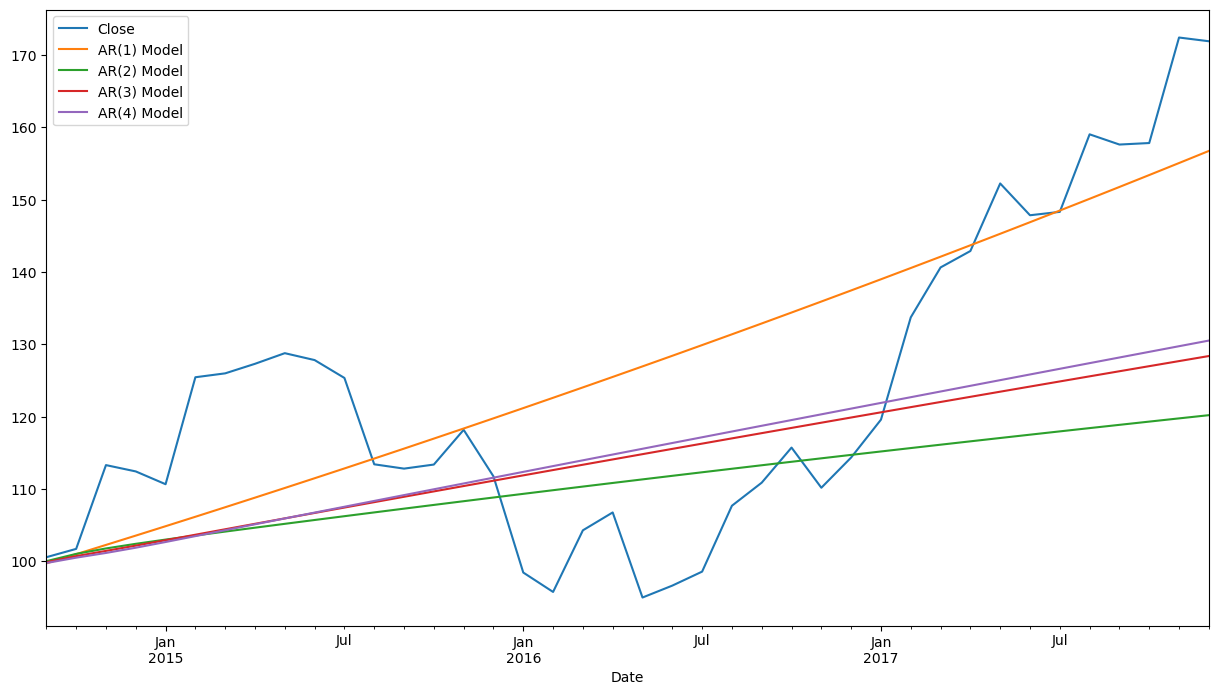

In [5]:
test.Close.plot(figsize = (15,8), legend = True)
prediction_ar1.plot(legend = True)
prediction_ar2.plot(legend = True)
prediction_ar3.plot(legend = True)
prediction_ar4.plot(legend = True)

In [6]:
model_ar_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Close   No. Observations:                  104
Model:                     AutoReg(1)   Log Likelihood                -271.102
Method:               Conditional MLE   S.D. of innovations              3.364
Date:                Tue, 08 Oct 2024   AIC                            548.203
Time:                        11:18:06   BIC                            556.107
Sample:                    02-28-2006   HQIC                           551.405
                         - 08-31-2014                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5461      0.613      0.892      0.373      -0.654       1.747
Close.L1       1.0073      0.012     81.221      0.000       0.983       1.032
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9928           +0.0000j            0.9928            0.0000
-----------------------------------------------------------------------------
"""

---
# But, was I right using a AR model?

## Checks for Stationarity

* __Look at Plots__: You can review a time series plot of your data and visually check if there are any obvious trends or seasonality.
* __Summary Statistics__: You can review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences.
* __Statistical Tests__: You can use statistical tests to check if the expectations of stationarity are met or have been violated.

ref: https://machinelearningmastery.com/time-series-data-stationary-python/


## Augmented Dickey-Fuller unit root test.
# documentation: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

* __Null Hypothesis (H0)__: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
* __Alternate Hypothesis (H1)__: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.


In [7]:
from statsmodels.tsa.stattools import adfuller
X = train["Close"]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('series is stationary') if result[1] < 0.05 else print('series is non-stationary')


ADF Statistic: -0.281589
p-value: 0.928072
series is non-stationary


## What about the mortgages data?

In [8]:
data = pd.read_csv('data/mortgages.csv', sep = ';')
data = data.sort_values(by = ['fch'])

In [9]:
data

,fch,valor
221,2003M01,118040
220,2003M02,119166
219,2003M03,116565
218,2003M04,104744
217,2003M05,116615
...,...,...
4,2021M02,42601
3,2021M03,49686
2,2021M04,43249
1,2021M05,47417


In [10]:
from statsmodels.tsa.stattools import adfuller
X = data["valor"]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('series is stationary') if result[1] < 0.05 else print('series is non-stationary')

ADF Statistic: -1.558430
p-value: 0.504434
series is non-stationary


Still bad, but a little better! So we need to add more elements to our model!

### Brent Crude Oil Last Day Financ (BZ=F)

In [11]:
!pip install pandas_datareader


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!pip install yfinance


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

import datetime
stock_symbol='BZ=F'
start=datetime.datetime(2024,3,1)

df_brent = pdr.get_data_yahoo(stock_symbol, start=start)
df_brent 

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-01,81.970001,84.349998,81.809998,83.550003,83.550003,30885
2024-03-04,83.589996,84.070000,82.580002,82.800003,82.800003,26396
2024-03-05,82.970001,83.139999,81.730003,82.040001,82.040001,37442
2024-03-06,82.080002,84.059998,81.889999,82.959999,82.959999,35173
2024-03-07,82.839996,83.470001,82.070000,82.959999,82.959999,32447
...,...,...,...,...,...,...
2024-10-02,74.400002,76.129997,73.589996,73.900002,73.900002,53911
2024-10-03,74.730003,77.970001,74.309998,77.620003,77.620003,68997
2024-10-04,77.989998,79.300003,77.389999,78.050003,78.050003,57481


In [14]:
from statsmodels.tsa.stattools import adfuller
X = df_brent["Close"]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('series is stationary') if result[1] < 0.05 else print('series is non-stationary')

ADF Statistic: -1.539264
p-value: 0.514006
series is non-stationary


# Transformation to make your time series stationary!
ref: https://www.youtube.com/watch?v=1c_QpeLlcjg

* Differecing: today - yesterday or today/yesterday using .shift(1) or .shift(p)
* Rolling averages: today - moving average using .rolling(window = 20).mean()
* Transformation: transformation(today) using: 
    * np.log() - logarithimc transformaiton
    * np.sqrt() - square root transformation
    * np.cbrt() - cube root transformation
    
After the transformation, one should __test for stationarity of the time series again__.

Note that __stationarity is necessary for ARIMA and ARIMA based models__ like the whole GARCH family, for example DCC-GARCH (Dynamic Conditional Correlation GARCH Model).

On the other hand, __stationarity is not necessary for Long short-term memory (LSTM)__ models, as LSTM is an artificial neural network model which can deal with complex trends natively. 


In [15]:
from statsmodels.tsa.stattools import adfuller
X = df_brent["Close"]/df_brent["Close"].shift(1)
X = X.dropna()
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('series is stationary') if result[1] < 0.05 else print('series is non-stationary')

ADF Statistic: -11.469886
p-value: 0.000000
series is stationary


### Test for autocorrelation

We will use the Durbin-Watson test for autocorrelation.  The Durbin-Watson statistic ranges in value from 0 to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; a value toward 4 indicates negative autocorrelation.


The Hypotheses for the Durbin Watson test are:
H0 = no first order autocorrelation.
H1 = first order correlation exists.
(For a first order correlation, the lag is one time unit).
Assumptions are:


The Durbin Watson test reports a test statistic, with a value from 0 to 4, where:

* 1.5 to 2.5 is no autocorrelation.
* 0 to <1.5 is positive autocorrelation (common in time series data).
* \>2.5 to 4 is negative autocorrelation (less common in time series data).

In [16]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(df_brent["Close"])

0.0002489451679677676

We OK to go as autocorrelation exists!

Autocorrelation is necessary when using univariate time series forecasting, __if autocorrelation does not exist__ we need to __introduce exogenous variables__ and perform multivariate time series analysis. Although some techiniques have been generalised to be multivariate, without doubt, __LSTM and related techiniques are the most frequent in this case__. We will see LSTM next VC ;-)  

In [17]:
df_brent["return"] = df_brent["Close"]/df_brent["Close"].shift(1)
df_brent = df_brent.dropna()

In [18]:
start, end

(datetime.datetime(2024, 3, 1, 0, 0), 143)

In [19]:
df_brent

,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2024-03-04,83.589996,84.070000,82.580002,82.800003,82.800003,26396,0.991023
2024-03-05,82.970001,83.139999,81.730003,82.040001,82.040001,37442,0.990821
2024-03-06,82.080002,84.059998,81.889999,82.959999,82.959999,35173,1.011214
2024-03-07,82.839996,83.470001,82.070000,82.959999,82.959999,32447,1.000000
2024-03-08,83.339996,83.839996,81.709999,82.080002,82.080002,26605,0.989393
...,...,...,...,...,...,...,...
2024-10-02,74.400002,76.129997,73.589996,73.900002,73.900002,53911,1.004622
2024-10-03,74.730003,77.970001,74.309998,77.620003,77.620003,68997,1.050338
2024-10-04,77.989998,79.300003,77.389999,78.050003,78.050003,57481,1.005540


### Auto Regressive Model using ARIMA from statsmodels

To create our moving average model we shall use ARIMA from statsmodels. This is a composite of an autoregressive model, AR(p), an integration model, I(d), and a moving average model, MA(q), which is passed via the tuple order(p,d,q). Here we shall use again a window of p=1:

In [20]:
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(endog=df_brent['return'], order=(1, 0, 0))
results = ARMA_model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  152
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 411.181
Date:                Tue, 08 Oct 2024   AIC                           -816.363
Time:                        11:18:18   BIC                           -807.291
Sample:                             0   HQIC                          -812.677
                                - 152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9998      0.001    701.761      0.000       0.997       1.003
ar.L1          0.0580      0.097      0.597      0.550      -0.132       0.248
sigma2         0.0003    2.4e-05     10.915      0.0

D:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [21]:
df_brent

,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2024-03-04,83.589996,84.070000,82.580002,82.800003,82.800003,26396,0.991023
2024-03-05,82.970001,83.139999,81.730003,82.040001,82.040001,37442,0.990821
2024-03-06,82.080002,84.059998,81.889999,82.959999,82.959999,35173,1.011214
2024-03-07,82.839996,83.470001,82.070000,82.959999,82.959999,32447,1.000000
2024-03-08,83.339996,83.839996,81.709999,82.080002,82.080002,26605,0.989393
...,...,...,...,...,...,...,...
2024-10-02,74.400002,76.129997,73.589996,73.900002,73.900002,53911,1.004622
2024-10-03,74.730003,77.970001,74.309998,77.620003,77.620003,68997,1.050338
2024-10-04,77.989998,79.300003,77.389999,78.050003,78.050003,57481,1.005540


In [22]:
start_date = '2024-03-04'
end_date   = '2024-10-08'
df_brent['forecast_ar1'] = results.predict(start=start_date)


C:\Users\manoe\AppData\Local\Temp\ipykernel_540\1432910133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brent['forecast_ar1'] = results.predict(start=start_date)


In [23]:
df_brent[['return','forecast_ar1']].tail(100)

,return,forecast_ar1
Date,,
2024-05-16,1.006284,1.000047
2024-05-17,1.008527,1.000151
2024-05-20,0.996785,1.000281
2024-05-21,0.990085,0.999600
2024-05-22,0.988176,0.999211
...,...,...
2024-10-02,1.004622,1.001233
2024-10-03,1.050338,1.000054
2024-10-04,1.005540,1.002706


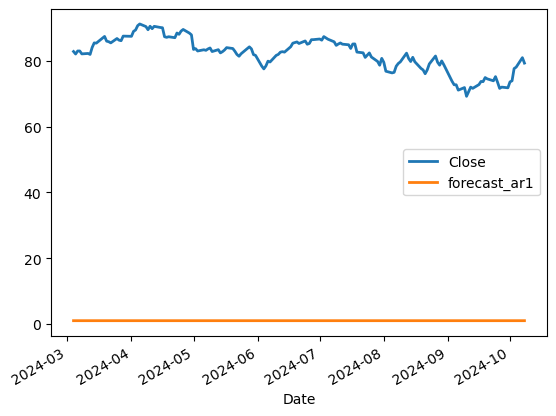

In [24]:
df_brent[['Close','forecast_ar1']].plot(lw=2);



In [25]:
#from sklearn.metrics import mean_squared_error
#error_ar1 = mean_squared_error(df_brent['return'].tail(100),df_brent['forecast_ar1'].tail(100))
#print(f'AR(1) MSE -> {error_ar1}')


Moving Average (MA) Models  - Short Memory Models

In a Moving Average 1, MA(1), the forecast is calculated based on the error of the previous day.

In a Moving Average q, MA(q), the forecast is calculated based on the moving average errors of the __q__ previous day.


#### VIDEO: 
MA Models - https://www.youtube.com/watch?v=zNLG8tsA_Go

__Rolling average__

We shall now create a rolling average, with a window size of 10, using pandas.DataFrame.rolling


C:\Users\manoe\AppData\Local\Temp\ipykernel_540\3286403859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brent['rolling_av'] = df_brent['return'].rolling(10).mean()


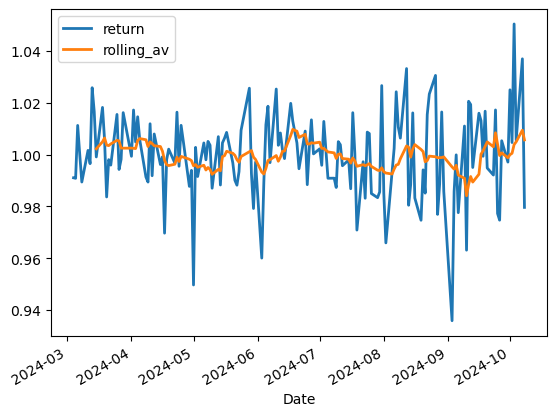

In [26]:
df_brent['rolling_av'] = df_brent['return'].rolling(10).mean()
# take a look
df_brent[['return','rolling_av']].plot(lw=2);



In [27]:
from sklearn.metrics import mean_squared_error
error_ar1 = mean_squared_error(df_brent['return'].tail(100),df_brent['forecast_ar1'].tail(100))
print(f'AR(1) MSE -> {error_ar1}')
error_rolling_av = mean_squared_error(df_brent['return'].tail(100),df_brent['rolling_av'].tail(100))
print(f'rolling(10) moving average MSE -> {error_rolling_av}')


AR(1) MSE -> 0.00031545580465994845
rolling(10) moving average MSE -> 0.0002930137553553435


### Moving average model

To create our moving average model we shall use ARIMA from statsmodels. This is a composite of an autoregressive model, AR(p
), an integration model, I(d), and a moving average model, MA(q), which is passed via the tuple order(p,d,q). Here we shall use again a window of q=10:

In [28]:
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(endog=df_brent['return'], order=(0, 0, 10))
results = ARMA_model.fit()
print(results.summary())

D:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  152
Model:                ARIMA(0, 0, 10)   Log Likelihood                 415.215
Date:                Tue, 08 Oct 2024   AIC                           -806.430
Time:                        11:18:20   BIC                           -770.144
Sample:                             0   HQIC                          -791.689
                                - 152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9997      0.001    776.761      0.000       0.997       1.002
ma.L1          0.0298      0.105      0.284      0.777      -0.176       0.236
ma.L2          0.0232      0.079      0.294      0.7

D:\Anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
df_brent

,Open,High,Low,Close,Adj Close,Volume,return,forecast_ar1,rolling_av
Date,,,,,,,,,
2024-03-04,83.589996,84.070000,82.580002,82.800003,82.800003,26396,0.991023,0.999773,NaN
2024-03-05,82.970001,83.139999,81.730003,82.040001,82.040001,37442,0.990821,0.999265,NaN
2024-03-06,82.080002,84.059998,81.889999,82.959999,82.959999,35173,1.011214,0.999254,NaN
2024-03-07,82.839996,83.470001,82.070000,82.959999,82.959999,32447,1.000000,1.000436,NaN
2024-03-08,83.339996,83.839996,81.709999,82.080002,82.080002,26605,0.989393,0.999786,NaN
...,...,...,...,...,...,...,...,...,...
2024-10-02,74.400002,76.129997,73.589996,73.900002,73.900002,53911,1.004622,1.001233,1.000464
2024-10-03,74.730003,77.970001,74.309998,77.620003,77.620003,68997,1.050338,1.000054,1.003828
2024-10-04,77.989998,79.300003,77.389999,78.050003,78.050003,57481,1.005540,1.002706,1.004903


### Predictions

We shall now look at the predictions made by our moving average model


In [30]:
df_brent['forecast_ma10'] = results.predict(start=start_date)



C:\Users\manoe\AppData\Local\Temp\ipykernel_540\281117180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brent['forecast_ma10'] = results.predict(start=start_date)


In [31]:
df_brent[['return','forecast_ma10']].tail(10)



,return,forecast_ma10
Date,,
2024-09-25,0.977252,0.997237
2024-09-26,0.974680,0.998834
2024-09-27,1.005307,0.998086
2024-09-30,0.997082,0.997738
2024-10-01,1.024941,1.001131
2024-10-02,1.004622,1.002363
2024-10-03,1.050338,1.004836
2024-10-04,1.005540,1.008538
2024-10-07,1.036899,1.000504


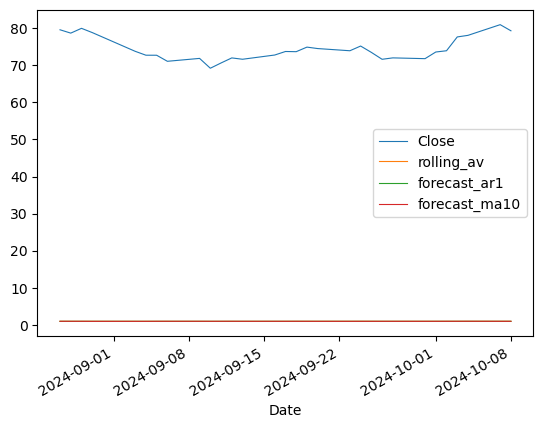

In [32]:


df_brent[['Close','rolling_av','forecast_ar1','forecast_ma10']].tail(30).plot(lw=0.8);



In [33]:
from sklearn.metrics import mean_squared_error
error_ar1 = mean_squared_error(df_brent['return'].tail(100),df_brent['forecast_ar1'].tail(100))
print(f'AR(1) MSE -> {error_ar1}')
error_rolling_av = mean_squared_error(df_brent['return'].tail(100),df_brent['rolling_av'].tail(100))
print(f'rolling(10) moving average MSE -> {error_rolling_av}')
error_ma10 = mean_squared_error(df_brent['return'].tail(100),df_brent['forecast_ma10'].tail(100))
print(f'MA(10) MSE -> {error_ma10}')



AR(1) MSE -> 0.00031545580465994845
rolling(10) moving average MSE -> 0.0002930137553553435
MA(10) MSE -> 0.00029784021673100083


In [34]:
from statsmodels.tsa.stattools import adfuller
X = df_brent["return"]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -11.469886
p-value: 0.000000


# ARMA MODELS

To create our auto regressive + moving average model we shall use ARIMA from statsmodels. 

This is a composite of an autoregressive model, AR(p), an integration model, I(d), and a moving average model, MA(q), which is passed via the tuple order(p,d,q). 

Here we shall use again a window of p=1 and q=10.


In [35]:
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(endog=df_brent['return'], order=(1, 0, 10))
results = ARMA_model.fit()
print(results.summary())

D:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  152
Model:                ARIMA(1, 0, 10)   Log Likelihood                 415.290
Date:                Tue, 08 Oct 2024   AIC                           -804.579
Time:                        11:18:21   BIC                           -765.269
Sample:                             0   HQIC                          -788.610
                                - 152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9998      0.001    677.152      0.000       0.997       1.003
ar.L1          0.5261      0.632      0.833      0.405      -0.712       1.765
ma.L1         -0.4987      0.648     -0.770      0.4

D:\Anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
start_date = '2022-01-12'
df_brent['forecast_ar1ma10'] = results.predict(start=start_date)

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
df_brent[['return','rolling_av','forecast_ar1','forecast_ma10','forecast_ar1ma10']].tail(30).plot(lw=0.8);


In [ ]:
from sklearn.metrics import mean_squared_error
error_ar1 = mean_squared_error(df_brent['return'].tail(100),df_brent['forecast_ar1'].tail(100))
print(f'AR(1) MSE -> {error_ar1}')
error_rolling_av = mean_squared_error(df_brent['return'].tail(100),df_brent['rolling_av'].tail(100))
print(f'rolling(10) moving average MSE -> {error_rolling_av}')
error_ma10 = mean_squared_error(df_brent['return'].tail(100),df_brent['forecast_ma10'].tail(100))
print(f'MA(10) MSE -> {error_ma10}')
error_ar1ma10 = mean_squared_error(df_brent['return'].tail(100),df_brent['forecast_ar1ma10'].tail(100))
print(f'ARMA(1,10) MSE -> {error_ar1ma10}')

# Test for autocorrelation

We will use the Durbin-Watson test for autocorrelation.  The Durbin-Watson statistic ranges in value from 0 to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; a value toward 4 indicates negative autocorrelation.

In [ ]:
durbin_watson(df_monthly.Close) 

## ACF & PACF Plotting

In [ ]:
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.tsa.api as smt


def tsplot(y, lags=None, figsize=(12, 7), style='bmh'): # [3]
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

In [ ]:
tsplot(df_monthly.Close, lags=10)

In [ ]:
tsplot(df_monthly.Close.diff(1).dropna(), lags=10)

# Hyper parameter tunning for ARIMA models using Auto-Arima from pmdarima:
ref: Auto Arima in Python: https://www.youtube.com/watch?v=8FCDpFhd1zk

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_brent['return'], trace=True,
suppress_warnings=True, start_p=2, max_p=10, start_d=1, max_d=3, start_q=1, max_q=3)

# question: 

## what we means for ARIMA(0,0,0) to the best model?
* A model just with a constant? 
* A bad model?
* It means that your data is white noise? ref: https://otexts.com/fpp2/non-seasonal-arima.html
* Maybe, it means that ARIMA models are not good for this data?

## why ARIMA(0,0,0) is the best model?
* Maybe we coudl check that is not a good fit before?

# References

<img src="https://media.giphy.com/media/jsm7XMcyeTFJE4vHzO/giphy.gif">

* [1] -> https://en.wikipedia.org/wiki/Time_series#:~:text=A%20time%20series%20is%20a,sequence%20of%20discrete%2Dtime%20data.
* [2] -> https://cmapskm.ihmc.us/rid=1052458821502_1749267941_6906/components.pdf
* [3] -> https://www.kaggle.com/kashnitsky
* [4] -> https://otexts.com/fpp2/stationarity.html#fn14
* [5] -> https://www.statisticshowto.com/adf-augmented-dickey-fuller-test/
* [6] -> https://people.duke.edu/~rnau/411diff.htm
* [7] -> https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c
* [8] -> https://www.kaggle.com/code/utkukubilay/time-series-analysis-in-python/notebook 
* [9] -> https://www.datascienceassn.org/sites/default/files/Review%20of%20automated%20time%20series%20forecasting%20pipelines.pdf
* [10] ->https://github.com/hincaltopcuoglu/
* [11] ->https://www.udemy.com/user/joseportilla/